In [1]:
import  pandas as pd
df = pd.read_csv('generosity.csv')
df.head()

,experience,faith,cause,values
0,not at all,not at all,not at all,not at all
1,not at all,not at all,not at all,not at all
2,not at all,not at all,not at all,not at all
3,not at all,not at all,not at all,a little
4,not at all,not at all,not at all,a little


In [2]:
# Melt all columns into a single variable.
df = df.melt(var_name='motivation', value_name='rating')
# Set dtypes.
df['motivation'] = df['motivation'].astype('category')
rating_levels = ['not at all', 'a little', 'neutral', 'strongly',
'very strongly']
df['rating'] = df['rating'].astype(
pd.CategoricalDtype(categories=rating_levels, ordered=True))
df.head()

,motivation,rating
0,experience,not at all
1,experience,not at all
2,experience,not at all
3,experience,not at all
4,experience,not at all


In [3]:
# Create a normalised table (sum to 100% across rows).
table = pd.crosstab(df['motivation'], df['rating'],
normalize='index') * 100
# Sort by highest value.
table.sort_values(by='very strongly', inplace=True)
table.round(2)

rating,not at all,a little,neutral,strongly,very strongly
motivation,,,,,
faith,45.95,21.62,18.92,8.11,5.41
experience,21.62,32.43,18.92,18.92,8.11
cause,16.22,18.92,21.62,24.32,18.92
values,8.11,18.92,21.62,24.32,27.03


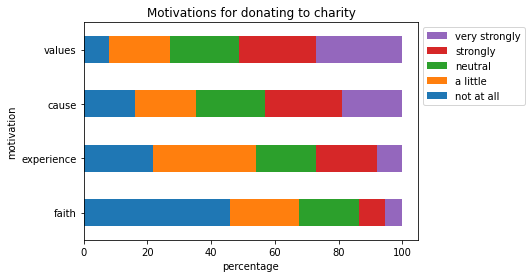

In [4]:
from matplotlib import pyplot as plt
ax = table.plot.barh(stacked=True)
# Manually draw legend: reverse order of labels and plot outside axes.
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('percentage')
ax.set_title('Motivations for donating to charity')
plt.show()

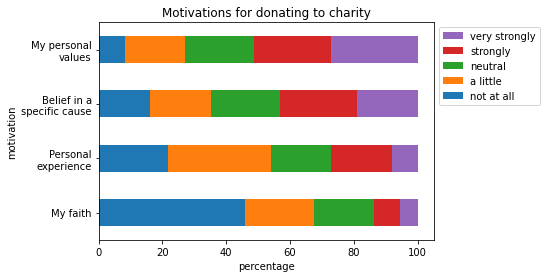

In [5]:
from textwrap import wrap
ax = table.plot.barh(stacked=True)
# Manually draw legend: reverse order of labels and plot outside axes.
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('percentage')
ax.set_title('Motivations for donating to charity')
# Better y-axis labels.
motivations = {'experience': 'Personal experience',
'faith': 'My faith',
'cause': 'Belief in a specific cause',
'values': 'My personal values'}
# Use textwrap library to break long lines automatically.
motivations = {k: '\n'.join(wrap(v, 17)) for k, v in motivations.items()}
# Replace original y-axis labels.
ax.set_yticklabels(table.index.map(motivations))
plt.show()

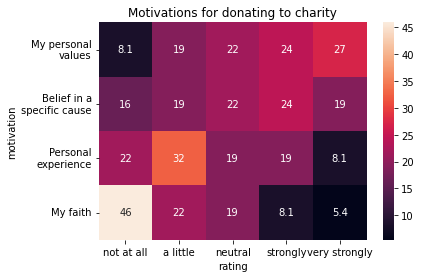

In [6]:
from textwrap import wrap
import seaborn as sns
ax = sns.heatmap(table, annot=True)
ax.set_title('Motivations for donating to charity')
# Better y-axis labels.
motivations = {'experience': 'Personal experience',
'faith': 'My faith',
'cause': 'Belief in a specific cause',
'values': 'My personal values'}
# Use textwrap library to break long lines automatically.
motivations = {k: '\n'.join(wrap(v, 17)) for k, v in motivations.items()}
# Replace original y-axis labels.
ax.set_yticklabels(table.index.map(motivations), rotation=0)
# Invert y-axis so most highly rated is at the top.
ax.invert_yaxis()
plt.show()

/home/mjams001/.local/lib/python3.8/site-packages/plot_likert/plot_likert.py:101: FutureWarning: parameter `plot_percentage` for `plot_likert.likert_counts` is deprecated, set it to None and use `compute_percentages` instead
  warn(


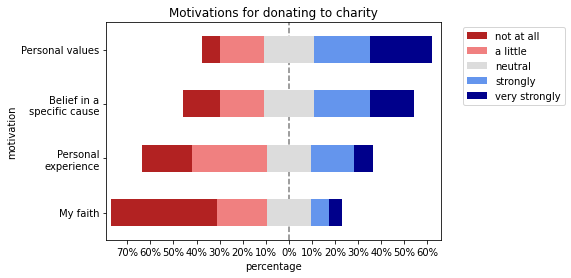

In [9]:
from textwrap import wrap
import plot_likert
# Better y-axis labels.
motivations = {'experience': 'Personal experience',
'faith': 'My faith',
'cause': 'Belief in a specific cause',
'values': 'Personal values'}
# Use textwrap library to break long lines automatically.
motivations = {k: '\n'.join(wrap(v, 17)) for k, v in motivations.items()}
# Plot the pre-aggregated and sorted table as percentages.
ax = plot_likert.plot_counts(table, table.columns,
plot_percentage=True)
ax.set_title('Motivations for donating to charity')
# Replace original y-axis labels.
ax.set_yticklabels(reversed(table.index.map(motivations)))
ax.invert_yaxis()
ax.set_xlabel('percentage')
plt.show()